# Image Processing

## Load, show and save image

In [ ]:
import numpy as np
import mayplotlib.pyplot as plt
from skimage import io
from PIL import Image

# load and plot the image
img = Image.open('abc.jpg') # img is a PIL.JpegImagePlugin.JpegImageFile instance
img.show() # just open the image, use on instance after Image.open()
plt.imshow(img) # open the image in pyplot window

img = io.imread('abc.jpg') # img is an array with shape like (640, 480, 3)
io.imshow(img) # open the image in pyplot window

img = plt.imread('abc.jpg') # img is an array with shape like (640, 480, 3)
plt.imshow(img)

a = np.asarray(img) # can be used on JpegImageFile instance
img = Image.fromarray(a) # this is a PIL.Image.Image instance

io.imsave('abc.png', img) # io.imsave(fname, arr, plugin=None, check_contrast=True, **plugin_args)
plt.imsave('abc.png', img) # plt.imsave(fname, arr, **kwargs) ## output format is inferred from the filename extension

load:

- `PIL.Image.open()` returns an instance of `PIL.Image`

- `io.imread()` and `plt.imread()` returns an image as an **ndarray**

show:

- `io.imshow()` only accepts **ndarray**

- `plt.imshow()` can accept both **ndarray** and `PIL` image

save:

- both `io.imsave()` and `plt.save()` accepts **ndarray**

## Making change to image

### Add patch to image

Text(300, 40, 'astronaut')

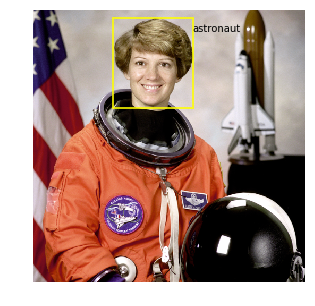

In [4]:
from skimage import data
import matplotlib.pyplot as plt

img = data.astronaut() # This is an np.array. Can be used in test, whose shape: (512, 512, 3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5)) # @1 
ax.axis('off')

ax.imshow(img, cmap='gray') # cmap can be omitted here because img is in rgb form @2
ax.add_patch(plt.Rectangle((150, 15), 150, 170, edgecolor='yellow', alpha=0.8, lw=2, facecolor='none')) # @3
ax.text(300, 40, 'astronaut', color='black')

# plt.savefig('astronaut.png') # @4

@1: The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.

@2: Note that `cmap` denotes for `Colormap`. Typically Colormap instances are used to convert data values (floats) from the interval [0, 1] to the RGBA color that the respective Colormap represents.

@3: ax.add_patch: Add a Patch to the axes' patches; return the patch.

@4: `plt.savefig(fname)`, which save the current figure, is different from `plt.imsave(fname, arr)`, which save an array as an image file.

### Crop Image

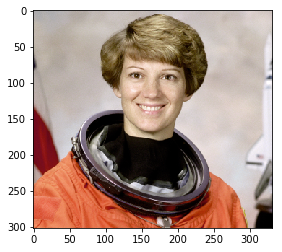

In [30]:
from skimage import data
from skimage.util import crop
import matplotlib.pyplot as plt

im = data.astronaut()
im = crop(im, crop_width=((10, 200), (60, 120), (0, 0))) # crop_width represents crop how much on each dimension @1

plt.imshow(im)
# plt.imsave('cropped_astronaut.png', im) # imsave can be used upon array

@1: e.g. (10, 200) represents crop left-most 10 elements and right-most 200 elements on 0 axis. And so on. 

### Change color

In [31]:
from skimage import data, color

im = data.astronaut()
im = color.rgb2gray(im) # Compute luminance of an RGB image. @1

print(im)
# plt.imsave('gray_astronaut.png', im)

[[5.83434902e-01 4.14859216e-01 2.44058431e-01 ... 4.75007843e-01
  4.58213333e-01 4.69121961e-01]
 [6.75588235e-01 5.56006667e-01 4.49052941e-01 ... 4.68548627e-01
  4.56501176e-01 4.55958431e-01]
 [7.66334902e-01 7.00524314e-01 6.49276078e-01 ... 4.76406667e-01
  4.62104314e-01 4.53978431e-01]
 ...
 [6.81696471e-01 6.81979216e-01 6.71889020e-01 ... 0.00000000e+00
  2.82745098e-04 0.00000000e+00]
 [6.74694510e-01 6.68532941e-01 6.64030196e-01 ... 2.82745098e-04
  3.92156863e-03 0.00000000e+00]
 [6.70482353e-01 6.63189804e-01 6.52838824e-01 ... 0.00000000e+00
  3.92156863e-03 0.00000000e+00]]


@1: The luminance image: Y = 0.2125 R + 0.7154 G + 0.0721 B - an array which is the same size as the input array, but with the channel dimension removed.

But I also noticed that the final output is Y/255.

### Resize, Rescale, Downscale

**Rescale** operation resizes an image by a given **scaling factor**. The scaling factor can either be a single floating point value, or multiple values - one along each axis.

**Resize** serves the same purpose, but allows to specify an **output image shape** instead of a scaling factor.

**Downscale** serves the purpose of down-sampling an n-dimensional image by integer factors using the local mean on the elements of each block of the size factors given as a parameter to the function.

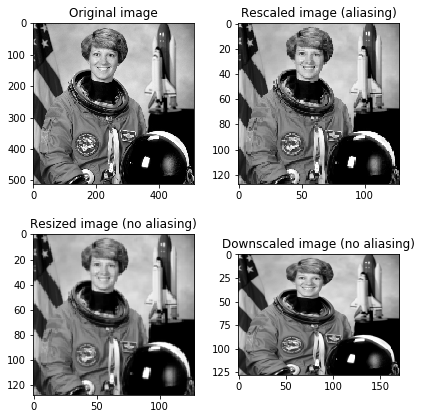

In [8]:
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

img = color.rgb2gray(data.astronaut())
img_rescaled = rescale(img, 1.0/4.0, anti_aliasing=False) # Aliasing in Chinese: 混波.
img_resized = resize(img, (img.shape[0]/4, img.shape[1]/4))
img_downscaled = downscale_local_mean(img, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(2*3, 2*3))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(img_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(img_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(img_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)

plt.tight_layout() # This makes layout looks good @1

@1: `plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)` Automatically adjust subplot parameters to give specified padding. `pad`: Padding between the figure edge and the edges of subplots, as a fraction of the font size.

### Flip & Rotate

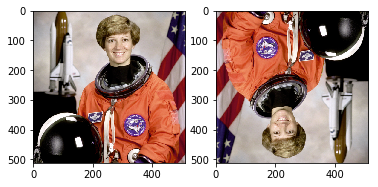

In [3]:
import numpy as np
from skimage import data

img = data.astronaut() # An np.array
img1 = np.fliplr(img) # flipped left and right
img2 = np.flipud(img) # flipped up and down

plt.subplot(121)
plt.imshow(img1)

plt.subplot(122)
plt.imshow(img2)

`skimage.transform.rotate`: Rotate image in degrees in **counter-clockwise** direction around its **center**.

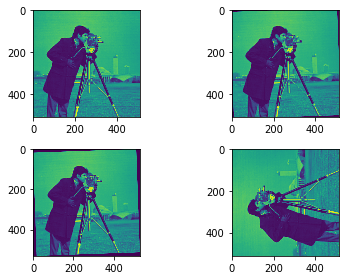

In [6]:
from skimage import data
from skimage.transform import rotate
import matplotlib.pyplot as plt

img = data.camera()
img1 = rotate(img, 2)
img2 = rotate(img, 2, resize=True)
img3 = rotate(img, 90, resize=True)

fig, axes = plt.subplots(2,2)
ax = axes.ravel()

ax[0].imshow(img)
ax[1].imshow(img1)
ax[2].imshow(img2)
ax[3].imshow(img3)

ax[2].set_xlim(0, 530)
ax[2].set_ylim(530, 0)
plt.tight_layout()

I noticed that `ax.set_xlim` and `ax.set_ylim` didn't work, so let's try this:

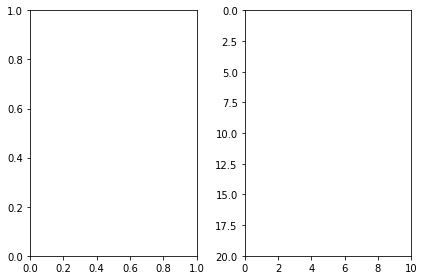

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2)
ax = axes.ravel()

ax[1].set_xlim(0, 10)
ax[1].set_ylim(20, 0)

plt.tight_layout()
plt.show()

It worked! This makes me confused.